In [1]:
import pandas as pd
import numpy as np
import seaborn as sn

In [2]:
# !pip install opendatasets

     |████████████████████████████████| 58 kB 38 kB/s eta 0:00:01
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=66f2b39f5ecfce673065f616640805b97d1313f5f5bcae465ffde92a5792aebf
  Stored in directory: /home/abir/.cache/pip/wheels/ac/b2/c3/fa4706d469b5879105991d1c8be9a3c2ef329ba9fe2ce5085e
Successfully built kaggle


In [8]:
# import opendatasets as od
# od.download_kaggle_dataset('https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data','dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: abdurrahimsheikh
Your Kaggle Key: ········


100%|██████████████████████████████████████| 2.44M/2.44M [00:01<00:00, 2.06MB/s]

In [10]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [14]:
df_sliced = df.price.copy()
type(df_sliced),df_sliced.shape

(pandas.core.series.Series, (48895,))

<AxesSubplot:xlabel='price', ylabel='Count'>

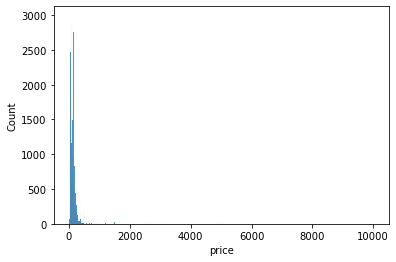

In [13]:
sn.histplot(df_sliced,kde=True)

<AxesSubplot:xlabel='price', ylabel='Count'>

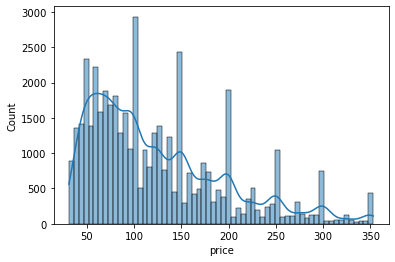

In [20]:
percentile_95 = df_sliced.quantile(0.95)
percentile_01 = df_sliced.quantile(0.01)
df_new = df_sliced[(df_sliced<percentile_95) & (df_sliced>percentile_01)]
sn.histplot(df_new,kde=True)